# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [4]:
train_dir = r'F:\ML Lab Spring 25\archive1\process_dataset\train'
validation_dir = r'F:\ML Lab Spring 25\archive1\process_dataset\validation'
test_dir = r'F:\ML Lab Spring 25\archive1\process_dataset\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

f:\ML Lab Spring 25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [12]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.6402 - loss: 0.9579
Epoch 1: val_loss improved from inf to 0.65481, saving model to F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-0001-loss0.65.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - acc: 0.6408 - loss: 0.9553 - val_acc: 0.7103 - val_loss: 0.6548
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7289 - loss: 0.6086
Epoch 2: val_loss did not improve from 0.65481
50/50 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - acc: 0.7288 - loss: 0.6084 - val_acc: 0.5794 - val_loss: 0.7651
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7570 - loss: 0.5358
Epoch 3: val_loss improved from 0.65481 to 0.48178, saving model to F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-0003-loss0.48.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - acc: 0.7573 - loss: 0.5354 - val_acc: 0.7500 - val_loss: 0.4818
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8007 - loss: 0.4499
Epoch 4: val_loss did not improve from 0.48178
50/50 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - acc: 0.8005 - loss: 0.4500 - val_acc: 0.7738 - val_loss: 0.5153
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7954 - loss: 0.4366
Epoch 5: val_loss improved from 0.48178 to 0.39459, saving model to F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-0005-loss0.39.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - acc: 0.7956 - loss: 0.4363 - val_acc: 0.8135 - val_loss: 0.3946
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8342 - loss: 0.3743
Epoch 6: val_loss improved from 0.39459 to 0.34711, saving model to F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-0006-loss0.35.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - acc: 0.8343 - loss: 0.3739 - val_acc: 0.8095 - val_loss: 0.3471
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8521 - loss: 0.3352
Epoch 7: val_loss improved from 0.34711 to 0.30625, saving model to F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-0007-loss0.31.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - acc: 0.8520 - loss: 0.3352 - val_acc: 0.8532 - val_loss: 0.3062
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8385 - loss: 0.3392
Epoch 8: val_loss did not improve from 0.30625
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - acc: 0.8388 - loss: 0.3388 - val_acc: 0.8571 - val_loss: 0.3195
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8854 - loss: 0.2632
Epoch 9: val_loss did not improve from 0.30625
50/50 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - acc: 0.8852 - loss: 0.2633 - val_acc: 0.8254 - val_loss: 0.3688
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8756 - loss: 0.2758
Epoch 10: val_loss improved from 0.30625 to 0.25644, saving model to F:\ML Lab Spring 25\archive1\checkpoints\\E1-cp-0010-loss0.26.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - acc: 0.8758 - loss: 0.2755 - val_acc: 0.8690 - val_loss: 0.2564


In [13]:
model_history.history

{'acc': [0.6681249737739563,
  0.7237499952316284,
  0.7718750238418579,
  0.7893750071525574,
  0.8056250214576721,
  0.8374999761581421,
  0.8481249809265137,
  0.8512499928474426,
  0.8762500286102295,
  0.8856250047683716],
 'loss': [0.8297186493873596,
  0.6019243001937866,
  0.516797661781311,
  0.4548529088497162,
  0.42118722200393677,
  0.35466861724853516,
  0.33618903160095215,
  0.3210172951221466,
  0.2683262526988983,
  0.2633627951145172],
 'val_acc': [0.7103174328804016,
  0.579365074634552,
  0.75,
  0.773809552192688,
  0.8134920597076416,
  0.8095238208770752,
  0.85317462682724,
  0.8571428656578064,
  0.8253968358039856,
  0.8690476417541504],
 'val_loss': [0.6548096537590027,
  0.7650833129882812,
  0.48177647590637207,
  0.5153263211250305,
  0.3945881128311157,
  0.34710773825645447,
  0.3062458634376526,
  0.31954795122146606,
  0.36880654096603394,
  0.25643613934516907]}

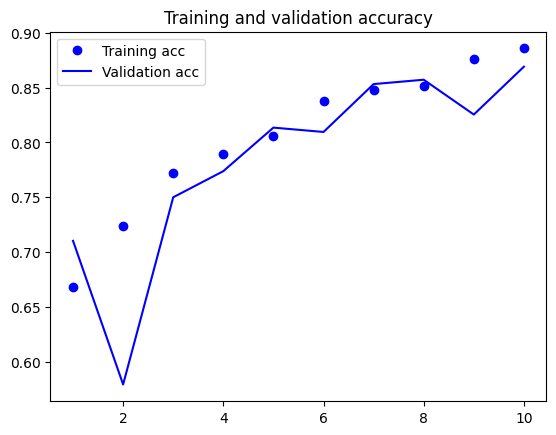

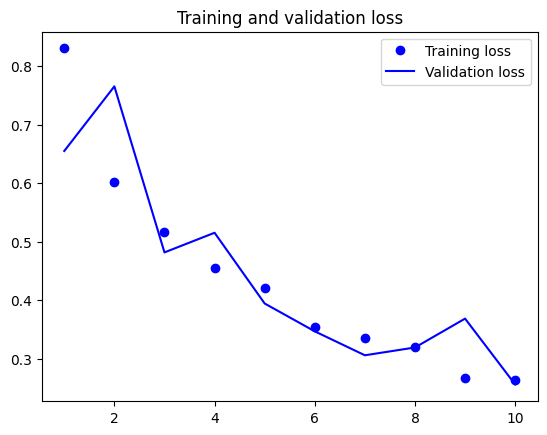

<Figure size 640x480 with 0 Axes>

In [15]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'F:\ML Lab Spring 25\archive1\checkpoints\model_Accuracy.png')

In [16]:
model.save(r'F:\ML Lab Spring 25\archive1\checkpoints\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.


f:\ML Lab Spring 25\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 487ms/step


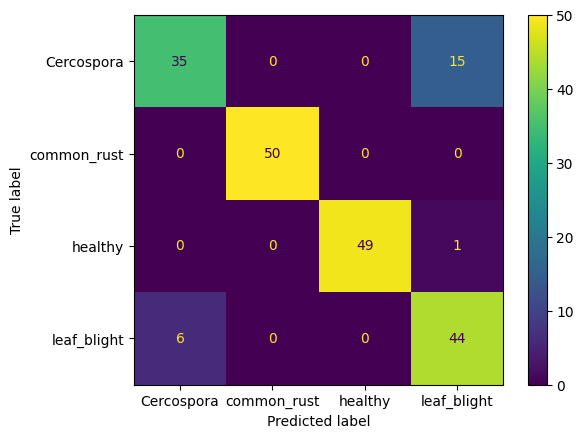

In [5]:
model = load_model(r'F:\ML Lab Spring 25\archive1\checkpoints\E1-cp-0012-loss0.21.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [6]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.85      0.70      0.77        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      0.98      0.99        50
 leaf_blight       0.73      0.88      0.80        50

    accuracy                           0.89       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200

